## 0. Importing pytorch and setting up device-agnostic code



In [26]:
import torch
from torch import nn

torch.__version__

'2.3.1+cpu'

In [27]:
## Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 1. Get Data

Using a subset of the Food101 dataset with only 3 classes (Steak, Pizza and sushi)

In [28]:
import requests
import zipfile
from pathlib import Path

## Data folder
DATA_PATH = Path('data')
IMG_PATH = DATA_PATH / 'pizza_steak_sushi'

## Create folder only if doesn't exist
if IMG_PATH.is_dir():
  print(f"{IMG_PATH} Already Exists......")
else:
  print(f"Creating {IMG_PATH} Folder ....")
  IMG_PATH.mkdir(parents=True, exist_ok=True)

# ## Download Food dataset subset
# with open(DATA_PATH / 'pizza_steak_sushi.zip','wb') as f:
#   request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
#   print("Downloading Dataset....")
#   f.write(request.content)

#   ## unzip file
#   with zipfile.ZipFile(DATA_PATH / 'pizza_steak_sushi.zip','r') as zip_ref:
#     print("Unzipping Dataset....")
#     zip_ref.extractall(IMG_PATH)


data\pizza_steak_sushi Already Exists......


## Data Preparation and Exploration

In [29]:
import os
def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents"""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [30]:
walk_through_dir(IMG_PATH)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [31]:
## define train and test path
TRAIN_PATH = IMG_PATH / 'train'
TEST_PATH = IMG_PATH / 'test'

TRAIN_PATH, TEST_PATH

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

### 2.1 Visualize Image
1. Get all Image paths and pick random
2. Get class name `pathlib.Path.parent.stem`
3. Open image
4. print out meta data

Random Image Path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Class Name: sushi
Image Height: 408
Image Width: 512


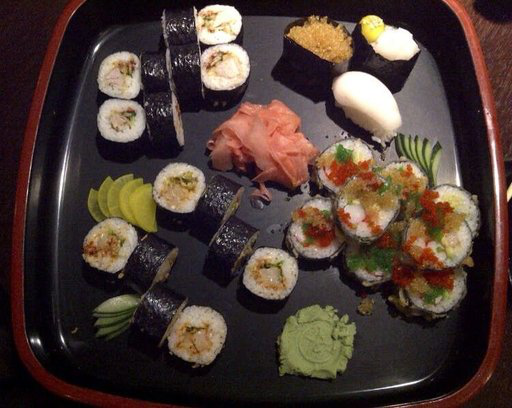

In [32]:
import random
from PIL import Image

## random seed
random.seed(42)


# Get all image path
image_path_list = list(IMG_PATH.glob('*/*/*.jpg'))

# select random image path
random_image_path = random.choice(image_path_list)

# get class name
class_name = random_image_path.parent.stem

# open image
img = Image.open(random_image_path)

# Meta-data
print(f"Random Image Path: {random_image_path}")
print(f"Class Name: {class_name}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

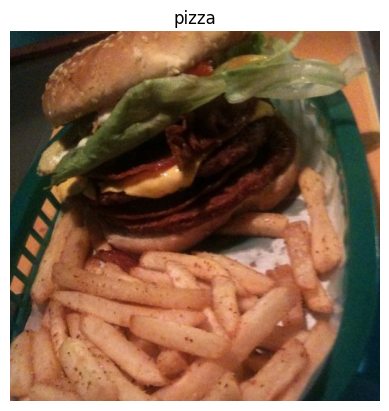

In [33]:
### Visualize Image with Matplotlib
import matplotlib.pyplot as plt

# Get all image path
image_path_list = list(IMG_PATH.glob('*/*/*.jpg'))

# select random image path
random_image_path = random.choice(image_path_list)

# get class name
class_name = random_image_path.parent.stem

# visualize image
img_2 = plt.imread(random_image_path)
plt.imshow(img_2)
plt.title(class_name)
plt.axis(False)

### Transforming Data

Before Images can be used with Pytorch
1. Turn target data into tensors
2. Turn it into `torch.utils.data.Dataset` and then into `torch.utils.data.DataLoader`. i.e `Dataset` and `DataLoader`

In [34]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import v2

### 3.1 Transform data with `torchvision.transforms`

In [35]:
### write transform for Image
data_transform = v2.Compose([
    v2.Resize((224,224)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor() # Turn image to tensor
])

In [36]:
data_transform(img)

tensor([[[0.1255, 0.1294, 0.1333,  ..., 0.0863, 0.0863, 0.0784],
         [0.1255, 0.1294, 0.1333,  ..., 0.0863, 0.0784, 0.0745],
         [0.1176, 0.1255, 0.1373,  ..., 0.0863, 0.0784, 0.0824],
         ...,
         [0.0314, 0.0275, 0.0235,  ..., 0.1216, 0.1176, 0.1333],
         [0.0392, 0.0392, 0.0314,  ..., 0.1255, 0.1255, 0.1294],
         [0.0275, 0.0314, 0.0314,  ..., 0.1216, 0.1333, 0.1216]],

        [[0.0471, 0.0510, 0.0549,  ..., 0.0510, 0.0510, 0.0431],
         [0.0510, 0.0510, 0.0588,  ..., 0.0510, 0.0431, 0.0353],
         [0.0549, 0.0588, 0.0667,  ..., 0.0431, 0.0392, 0.0431],
         ...,
         [0.0118, 0.0078, 0.0039,  ..., 0.0667, 0.0627, 0.0784],
         [0.0196, 0.0196, 0.0118,  ..., 0.0667, 0.0706, 0.0706],
         [0.0078, 0.0118, 0.0118,  ..., 0.0627, 0.0745, 0.0588]],

        [[0.0549, 0.0588, 0.0627,  ..., 0.0706, 0.0706, 0.0627],
         [0.0588, 0.0588, 0.0667,  ..., 0.0745, 0.0667, 0.0588],
         [0.0627, 0.0667, 0.0745,  ..., 0.0784, 0.0706, 0.

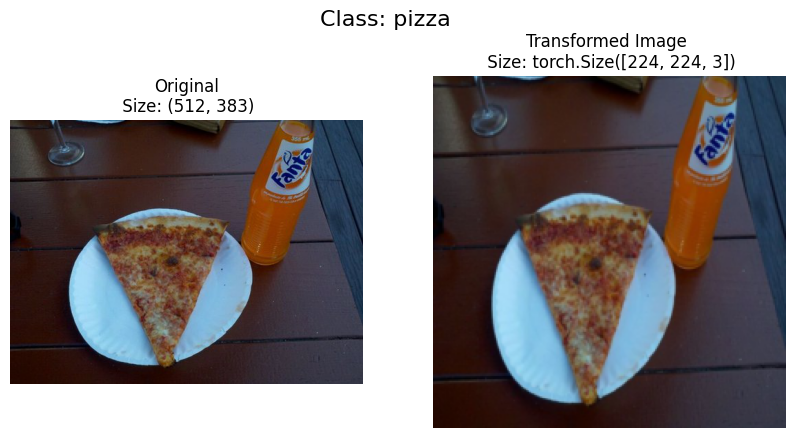

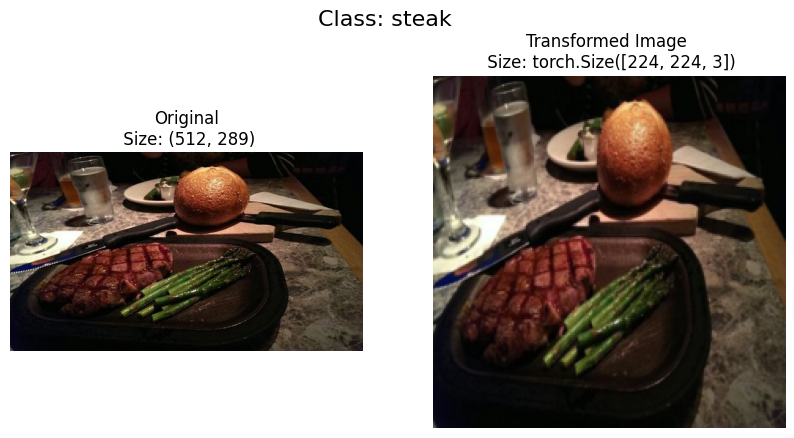

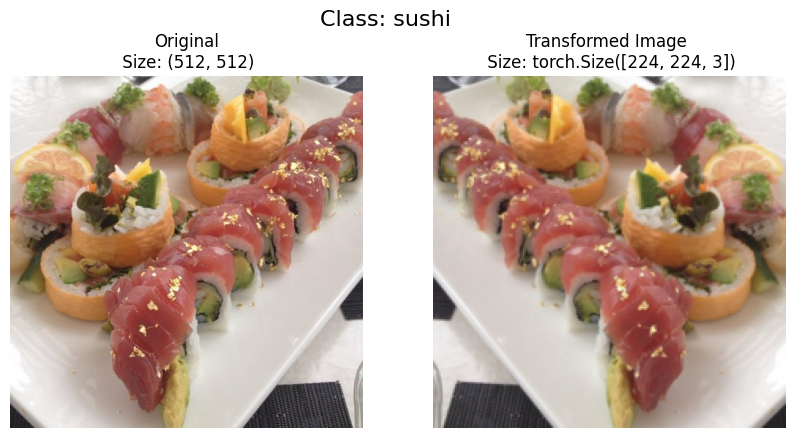

In [37]:
def plot_transformed_images(image_paths, transform, n=3,seed=45):
  """
Selects random images from path of images and loads transforms
plots original images vs the transformed images
  """
  random.seed(seed)
  random_images_path = random.sample(image_paths, k=n)

  for image_path in random_images_path:
    with Image.open(image_path) as img:
      fig,ax  = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
      ax[0].imshow(img)
      ax[0].set_title(f'Original\n Size: {img.size}')
      ax[0].axis(False)

      ## transform and plot target image
      img_transformed = transform(img).permute(1,2,0)
      ax[1].imshow(img_transformed)
      ax[1].set_title(f'Transformed Image \n Size: {img_transformed.shape}')
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,data_transform)


###  Option 1: Loading Image Data Using ImageFolder

In [38]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root='data/pizza_steak_sushi/train', # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root='data/pizza_steak_sushi/test', 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
                 Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
                 Resize(size=[224, 224], interpolation=InterpolationMode.BILINEAR, antialias=warn)
                 RandomHorizontalFlip(p=0.5)
                 ToTensor()
           )


In [39]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1137, 0.1176, 0.1255,  ..., 0.1098, 0.1098, 0.1098],
         [0.1176, 0.1137, 0.1137,  ..., 0.1176, 0.1176, 0.1137],
         [0.1137, 0.1176, 0.1098,  ..., 0.1216, 0.1255, 0.1216],
         ...,
         [0.0941, 0.0902, 0.0863,  ..., 0.1765, 0.1725, 0.1765],
         [0.0902, 0.0902, 0.0902,  ..., 0.1608, 0.1686, 0.1686],
         [0.0863, 0.0863, 0.0824,  ..., 0.1490, 0.1529, 0.1529]],

        [[0.0706, 0.0745, 0.0824,  ..., 0.0549, 0.0549, 0.0549],
         [0.0745, 0.0706, 0.0706,  ..., 0.0627, 0.0627, 0.0588],
         [0.0706, 0.0745, 0.0667,  ..., 0.0627, 0.0667, 0.0627],
         ...,
         [0.1098, 0.1059, 0.1020,  ..., 0.2353, 0.2314, 0.2314],
         [0.1059, 0.1059, 0.1059,  ..., 0.2275, 0.2314, 0.2314],
         [0.1020, 0.1020, 0.0980,  ..., 0.2196, 0.2235, 0.2235]],

        [[0.0941, 0.0980, 0.1059,  ..., 0.0196, 0.0196, 0.0196],
         [0.0980, 0.0941, 0.0941,  ..., 0.0235, 0.0235, 0.0196],
         [0.0941, 0.0980, 0.0902,  ..., 0.02

In [40]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


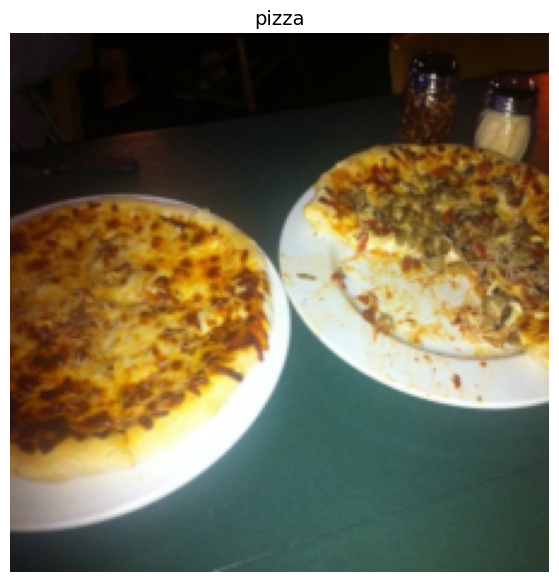

In [41]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


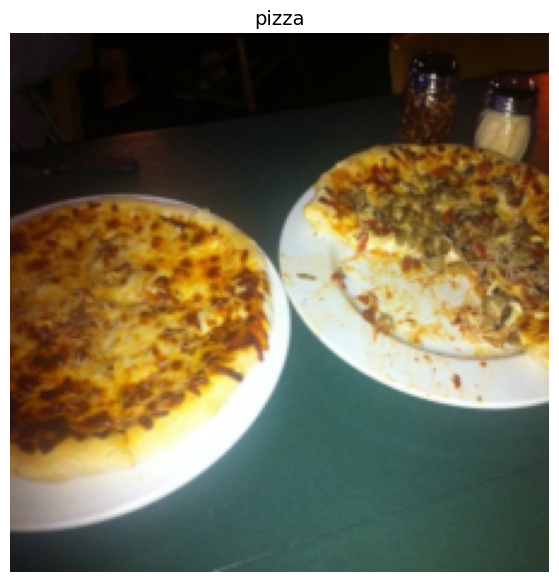

In [42]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

### Turn loaded images into DataLoader's

In [43]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=1, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=1, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e1990bcc10>,
 <torch.utils.data.dataloader.DataLoader at 0x1e198fcc590>)

In [44]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


### 5. Option 2: Loading Image Data with a Custom Dataset

1. Load images from folder
2. Get class names from dataset
3. Get class names as dictionary from the dataset

In [45]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision.transforms import v2
from typing import Tuple, Dict, List

In [46]:
# instance of torchvision.dataset.ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating helper function to get class names

1. Get class names using os.scandir to tranverse target directory. Assume target directory is in standard image classification format
2. Raise error if class names are not found 
3. Turn class names into a dict and list and return them

In [47]:
## define directory
TRAIN_PATH

WindowsPath('data/pizza_steak_sushi/train')

In [48]:

### setup target directory
target_dir = TRAIN_PATH
print(f'Target Directory: {target_dir}')

class_names_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_names_found


Target Directory: data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [49]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """_summary_

    Args:
        directory (str): Target directory organised in the standard image classification format
        Dataset
            - train |
                     - class_1
                               | 000.jpg
                     - class_2
                     - class_3
            - test |
                     - class_1
                     - class_2
                     - class_3

    Returns:
        Tuple[List[str], Dict[str, int]]: Class names
    """
    ## Get class name by scanning target directory
    classes = sorted(entry.name for entry in os.scandir(target_dir) if entry.is_dir())
    
    ## Return error if class names not found
    if not classes:
        raise FileNotFoundError(f'Could not find any classes in {directory}')
    
    ### create dict of index labels
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
    
    return classes, class_to_idx

In [50]:
find_classes(TRAIN_PATH)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`
1. Subclass `torch.utils.data.Dataser`
2. Init our subclass with traget directory
3. Create attributes
   * paths
   * transforms
   * classes
   * class_to_idx
4. Create function to `load_Images`
5. Overwrite `__len__()` and `__getitem__()`

In [51]:
#### writing custom dataset class

class ImageFolderCustom(Dataset):
    # initialize our custom dataset
    def __init__(self,
                 target_dir: str,
                 transform=None):
    # create class attr
        self.paths = list(pathlib.Path(target_dir).glob('*/*.jpg'))
    # setup transforms
        self.transform = transform
    # create classes and class_idx
        self.classes, self.class_to_idx = find_classes(target_dir)
        
    # create fnx to load images
    def load_image(self,index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    ## overwrite __len__()
    def __len__(self) -> int:
        return len(self.paths)
    
    
    ## overwrite __getitem__()
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data; data and label (X,y)"
        img = self.load_image(index)
        class_name = self.paths[index].parent.name  ##data_folder/class_name/x.jpg
        class_idx = self.class_to_idx[class_name]
        
        # Transform if needed
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img,class_idx

In [52]:
train_transforms = v2.Compose([
    v2.Resize(size = (64,64)),
    v2.RandomHorizontalFlip(p=0.5),
    v2.ToTensor()
])

test_transforms = v2.Compose([
     v2.Resize(size = (64,64)),
    v2.ToTensor()
])

In [53]:
train_data_custom = ImageFolderCustom(target_dir=TRAIN_PATH, transform=train_transforms)

test_data_custom = ImageFolderCustom(target_dir = TEST_PATH, transform=test_transforms )

In [54]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x1e19915a6d0>,
 <__main__.ImageFolderCustom at 0x1e199437890>)

In [55]:
len(train_data), len(train_data_custom)

(225, 225)

In [56]:
class_names = train_data_custom.classes

In [57]:
## check for equality
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### Create function to display random images


In [58]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool= True,
                          seed: int = None):
    
    # Adjust display if n is too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For Display purposes, n shouldn't be larger than 10, setting to 10 and removing display")
        
    # set the random seed
    if seed:
        random.seed(seed)
        
    # get random samples
    random_samples_idx = random.sample(range(len(dataset)), k=n )
    
    # set up plot
    plt.figure(figsize=(16,8))
    
    # Loop thrugh random indices and plot using Matplotlib
    for i, target_sample in enumerate(random_samples_idx):
        target_image, target_label = dataset[target_sample][0], dataset[target_sample][1]
    
        # Adjust tensor dims for plotting
        target_image = target_image.permute(1,2,0)  # CHW --> HWC
    
        # plot adjusted samples
        plt.subplot(1,n,i+1)
        plt.imshow(target_image)
        plt.axis('off')
        
        if classes:
            title = f'Classes: {classes[target_label]}'
            if display_shape:
                title = title + f"\nshape: {target_image.shape}"
        plt.title(title)
    
    
    

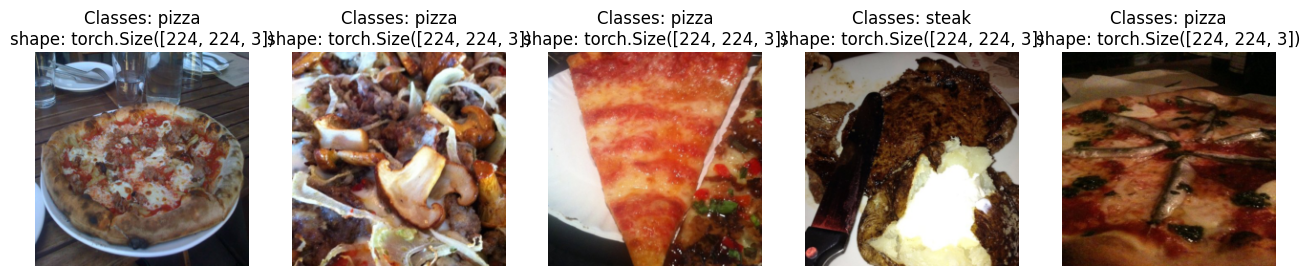

In [59]:
display_random_images(train_data,n=5,classes=class_names,seed=None)

## Turn Custom Loaded Images into `Dataloader`

In [60]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(
    dataset=train_data_custom,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(dataset=test_data_custom,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [61]:
test_dataloader, train_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1e19a0dfbd0>,
 <torch.utils.data.dataloader.DataLoader at 0x1e19a153e10>)

In [62]:
## Get Image and Label from custom dataloader

img, label = next(iter(train_dataloader))

img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [63]:
## Data Augmentation

from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
    
])

test_tranforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.ToTensor()
])

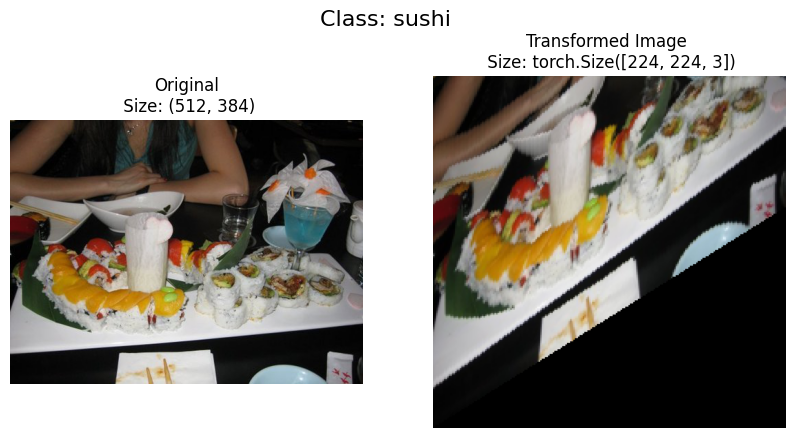

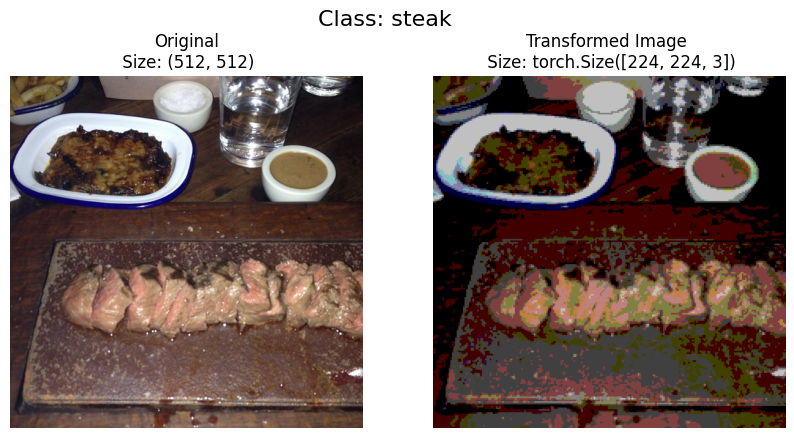

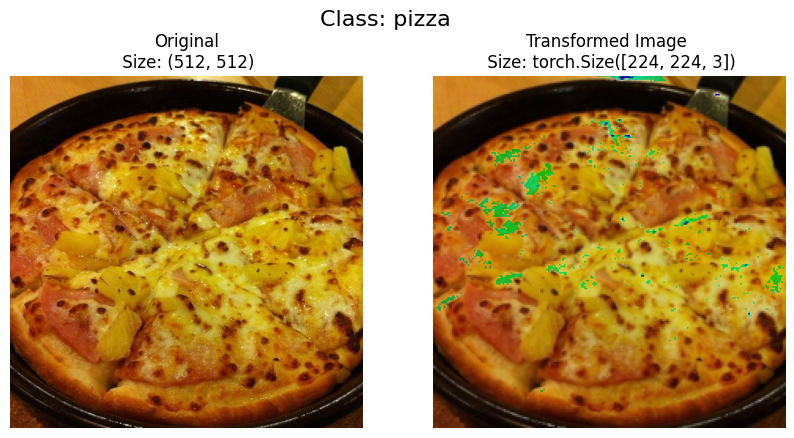

In [64]:
image_path_list

plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n = 3,
    seed=None
)

### Model 0: TinyVGG With Data Augmentationm

In [65]:
## Creating transforms and loading data

simple_transform  = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])



In [66]:
# Load and transform data

train_data_simple = datasets.ImageFolder(
    root=TRAIN_PATH,
    transform=simple_transform
)

test_data_simple = datasets.ImageFolder(
    root=TEST_PATH,
    transform=simple_transform
)

# Turn Data into Dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(
    dataset=train_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

test_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

In [67]:
NUM_WORKERS

12

## Create TinyVGG Model class

In [93]:
class TinyVGG(nn.Module):
    def __init__(self,input_shapes: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(
            in_channels = input_shapes,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=2,
                padding=0
            ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        ))
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0
            ),
        nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=2,
                padding=0
            ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
            
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*9,
                      out_features=output_shape)
        )
        
    def forward(self,x):
        x = self.conv_block(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        
        return x

In [94]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shapes=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_0

TinyVGG(
  (conv_block): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=90, out_features=3, bias=True)
  )
)

### Forward Pass on Single Image

In [79]:
# get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [95]:
# try Forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 15, 15])
torch.Size([32, 10, 3, 3])
torch.Size([32, 3])


tensor([[-0.0320, -0.0125,  0.0349],
        [-0.0316, -0.0093,  0.0331],
        [-0.0310, -0.0112,  0.0336],
        [-0.0321, -0.0113,  0.0327],
        [-0.0308, -0.0093,  0.0315],
        [-0.0320, -0.0115,  0.0338],
        [-0.0328, -0.0116,  0.0334],
        [-0.0313, -0.0108,  0.0349],
        [-0.0329, -0.0089,  0.0335],
        [-0.0310, -0.0101,  0.0334],
        [-0.0309, -0.0091,  0.0317],
        [-0.0338, -0.0123,  0.0347],
        [-0.0356, -0.0103,  0.0337],
        [-0.0305, -0.0105,  0.0326],
        [-0.0308, -0.0097,  0.0350],
        [-0.0320, -0.0128,  0.0341],
        [-0.0312, -0.0133,  0.0344],
        [-0.0312, -0.0117,  0.0332],
        [-0.0275, -0.0099,  0.0324],
        [-0.0343, -0.0142,  0.0354],
        [-0.0315, -0.0079,  0.0320],
        [-0.0314, -0.0103,  0.0338],
        [-0.0327, -0.0117,  0.0340],
        [-0.0331, -0.0102,  0.0333],
        [-0.0338, -0.0129,  0.0339],
        [-0.0336, -0.0124,  0.0322],
        [-0.0323, -0.0117,  0.0335],
 